## Set WD

In [1]:
import os
os.chdir("/home/sgf2/DBMI_server/adversarial_attacks/retinopathy/")
os.environ["CUDA_VISIBLE_DEVICES"]="2"

In [2]:
import scipy.stats as st
import keras 
from sklearn import metrics
from sklearn.metrics import auc

def mean_ci(x):
    mn = np.mean(x)
    ci = st.t.interval(0.95, len(x)-1, loc=np.mean(x), scale=st.sem(x))
    return (mn, ci[0], ci[1])

def printResults(model_preds, y_test):
    acc = np.mean(np.round(model_preds)[:,0] == y_test[:,0])
    print('Test accuracy: %0.4f' % acc)

    fpr, tpr, thresholds = metrics.roc_curve(y_test[:,1], model_preds[:,1])
    auc_score = auc(fpr,tpr)
    print('AUC: %0.4f' % auc_score)

    conf = mean_ci(np.max(model_preds, axis = 1))
    print('Avg. Confidence: ' + '{0:.6f} '.format(conf[0]) + \
          '({0:.6f}'.format(conf[1]) + ' - {0:.6f})'.format(conf[2]))

/home/anaconda/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Set up

In [3]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
from patch_derm_v2 import *

# Adversarial Patch Attack

## Train Patches

In [4]:
# Hyperparameters
epochs = 7
learning_rate = 5.0

# Load the models
resnet1 = ModelContainer('resnet1')
resnet2 = ModelContainer('resnet2')

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

Finished loading resnet1, took 35s
Finished loading resnet2, took 33s


## Display Results

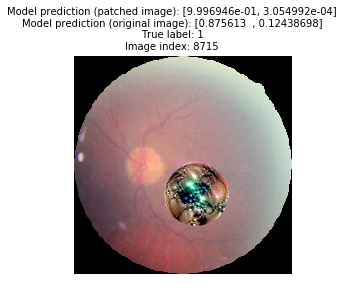

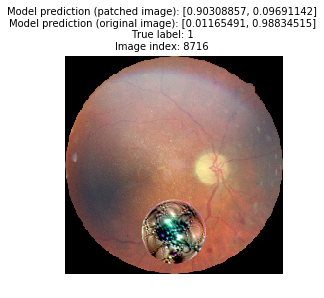

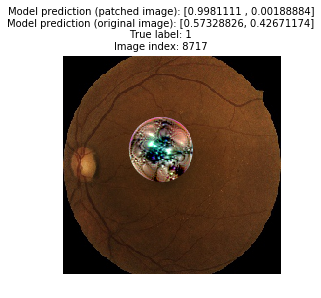

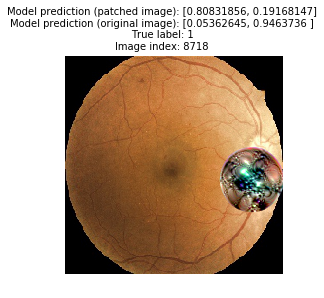

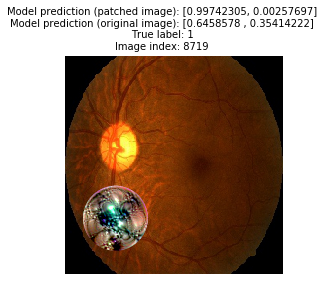

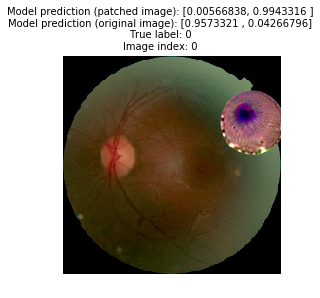

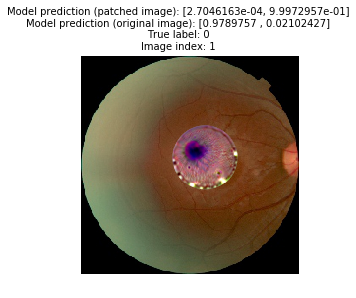

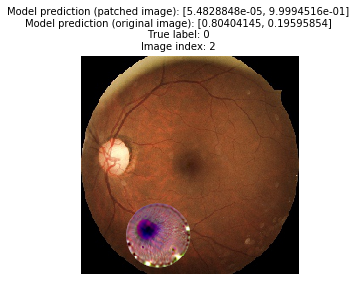

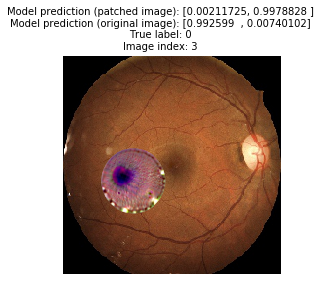

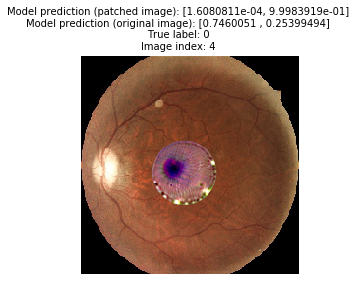

White Box:
Test accuracy: 0.0094
AUC: 0.0000
Avg. Confidence: 0.986514 (0.985444 - 0.987584)


In [7]:
# Loading the patch file 
epochs = 7
resnet1_patch_target1_wb = np.load('./patches/resnet1_patch_target1_epoch' + str(epochs) + '_wb.npy')
epochs = 7
resnet1_patch_target0_wb = np.load('./patches/resnet1_patch_target0_epoch' + str(epochs) + '_wb.npy')

# Apply
scale = 0.3
probs_patched_images, probs_original_images,indices, true_labels, winp = attack_combined(resnet1,patch_for_0=resnet1_patch_target0_wb,
                                             patch_for_1=resnet1_patch_target1_wb,
                                             n_show=5, scale=scale, predict_original=False)

# Print
print("White Box:")
printResults(probs_patched_images, keras.utils.to_categorical(true_labels))

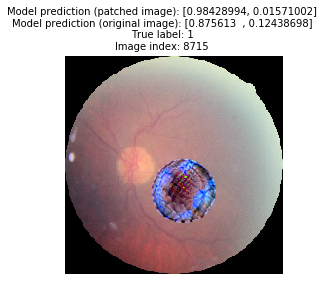

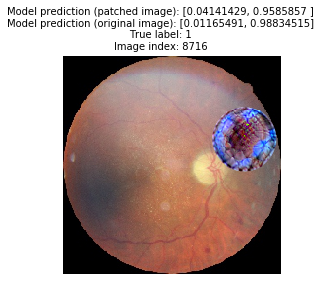

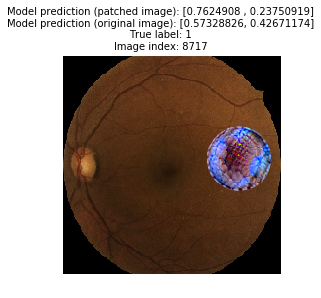

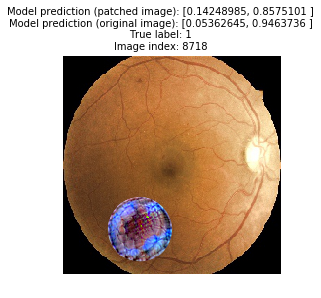

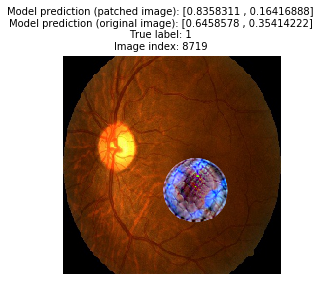

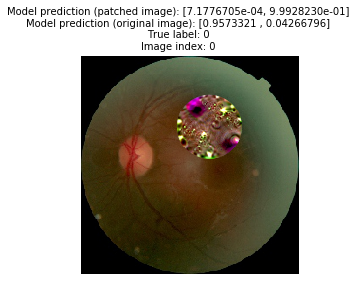

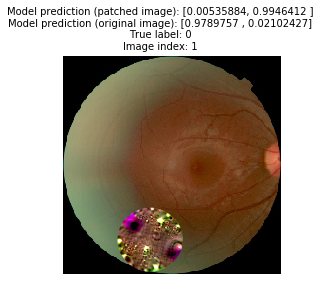

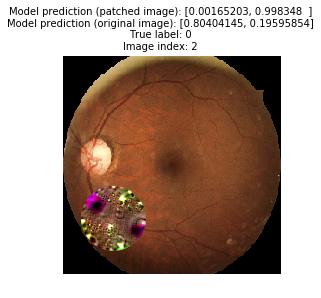

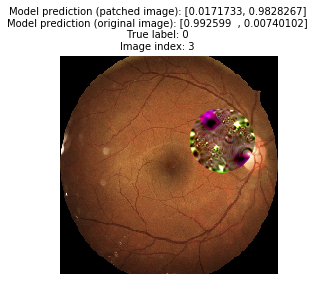

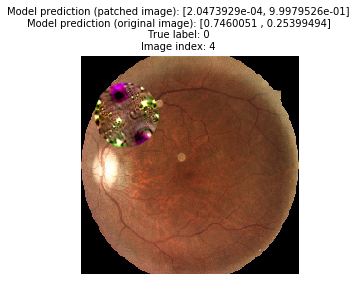


Black Box:
Test accuracy: 0.0763
AUC: 0.0017
Avg. Confidence: 0.969237 (0.967606 - 0.970868)


In [8]:
# Loading the patch file 
epochs = 7
resnet1_patch_target1_bb = np.load('./patches/resnet1_patch_target1_epoch' + str(epochs) + '_bb.npy')
resnet1_patch_target0_bb = np.load('./patches/resnet1_patch_target0_epoch' + str(epochs) + '_bb.npy')

scale = 0.3

# Apply
probs_patched_images, probs_original_images, indices, true_labels, winp = attack_combined(resnet1,
                                                                                          patch_for_0=resnet1_patch_target0_bb,
                                                                                          patch_for_1=resnet1_patch_target1_bb,
                                                                                          n_show=5, scale=scale, predict_original=False)
# Print
print("\nBlack Box:")
printResults(probs_patched_images, keras.utils.to_categorical(true_labels))

# Photoshop Patch Attacks

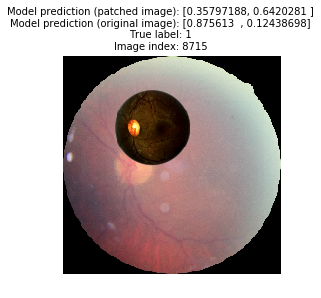

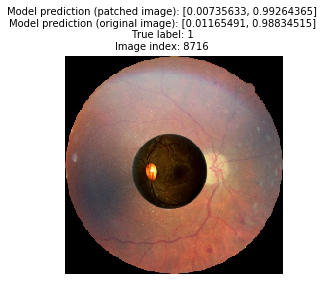

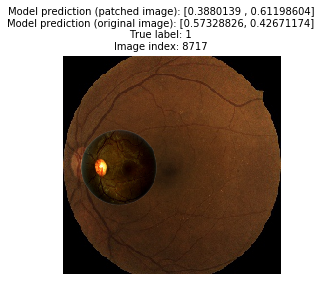

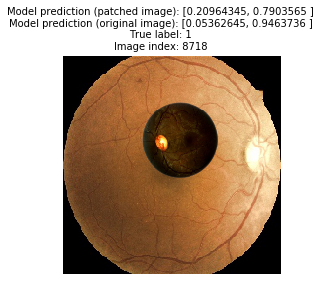

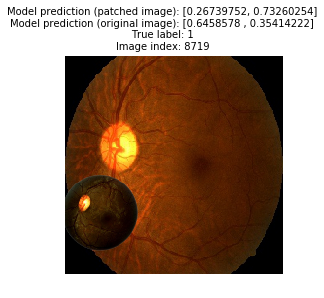

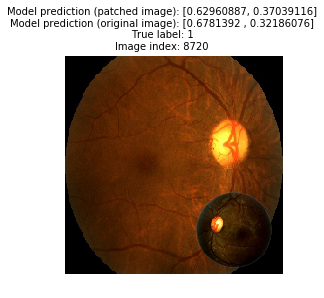

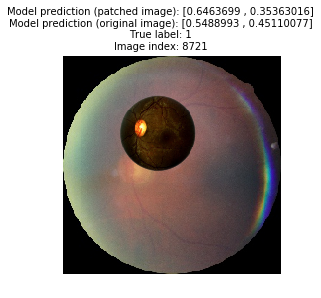

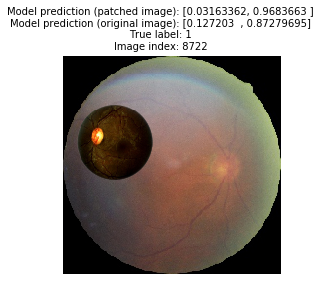

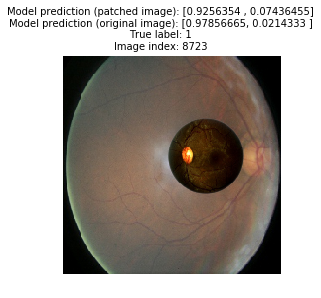

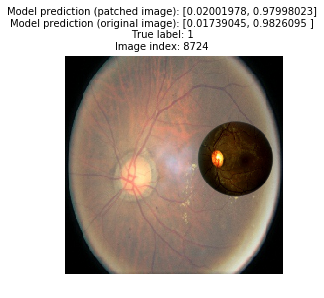

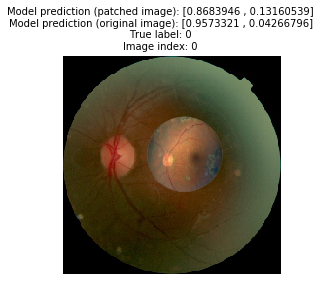

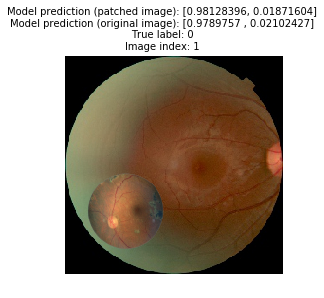

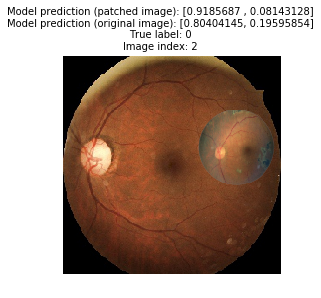

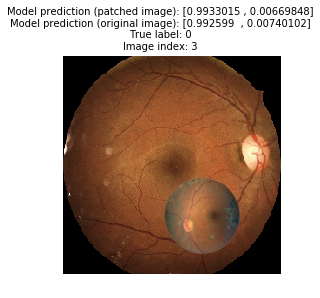

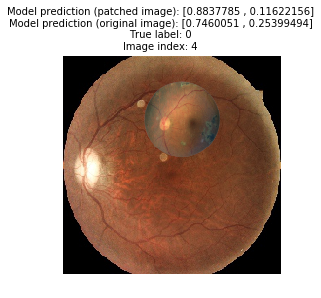

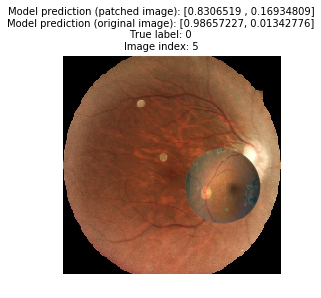

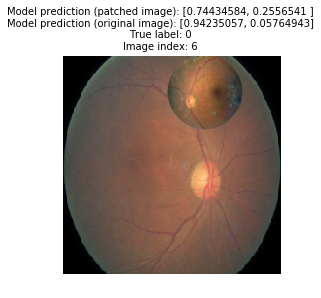

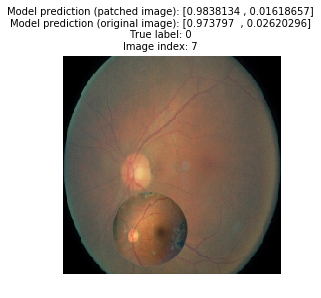

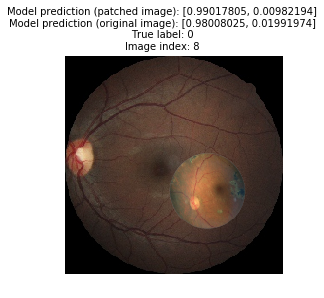

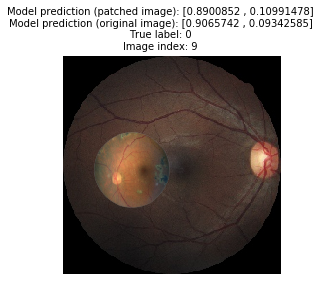

In [5]:
# Combined attack with mole-patches
file_name0 = './patches/natural_patch_min_p.npy'
file_name1 = './patches/natural_patch_max_p.npy'
mole_patch0 = np.load(file_name0)
mole_patch1 = np.load(file_name1)
scale = 0.35
probs_patched_images, probs_original_images, indices, true_labels, winp = attack_combined(resnet1, patch_for_0=mole_patch0, patch_for_1=mole_patch1, n_show=10, scale=scale, predict_original=False)
printResults(probs_patched_images, keras.utils.to_categorical(true_labels))

In [6]:
printResults(probs_patched_images, keras.utils.to_categorical(true_labels))

Test accuracy: 0.7939
AUC: 0.8807
Avg. Confidence: 0.827123 (0.824370 - 0.829876)


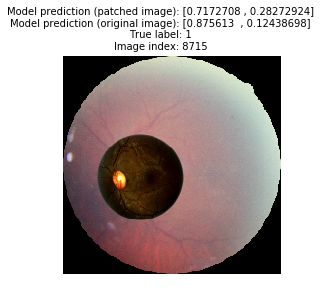

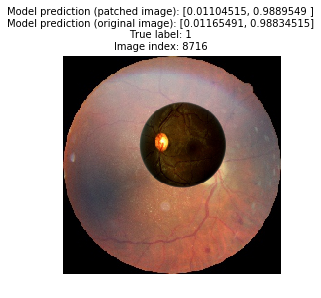

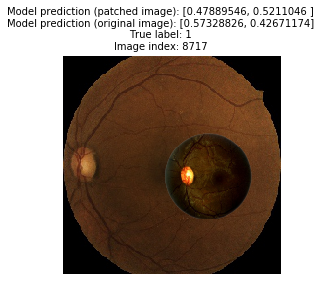

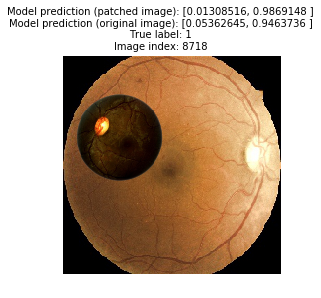

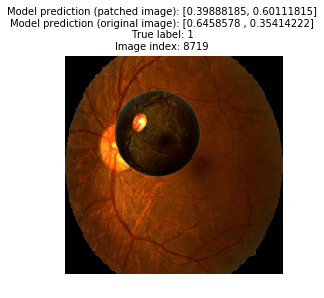

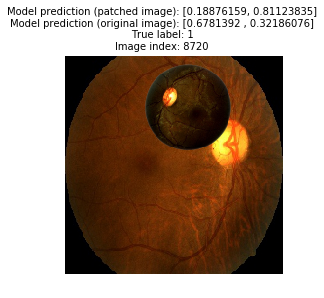

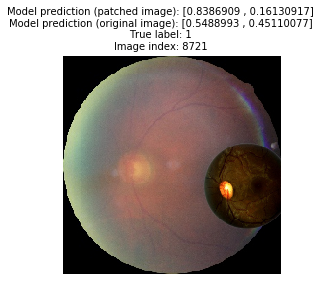

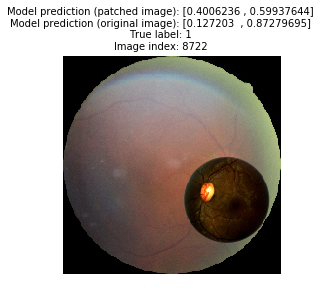

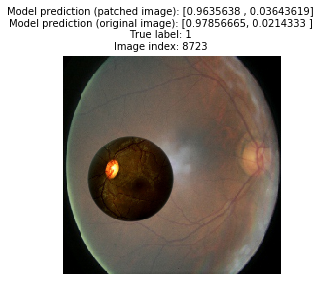

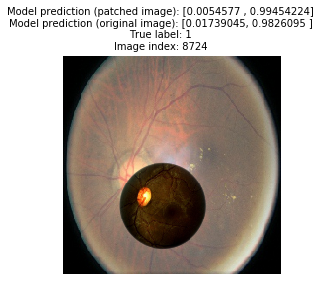

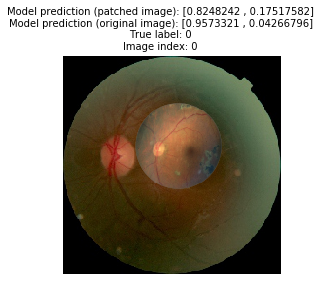

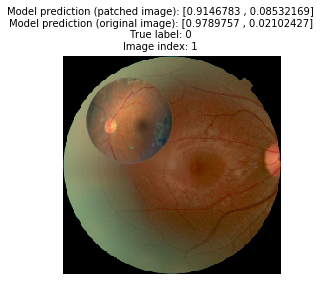

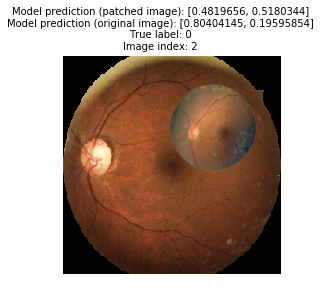

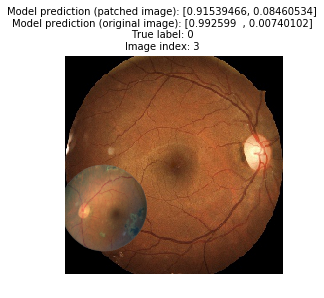

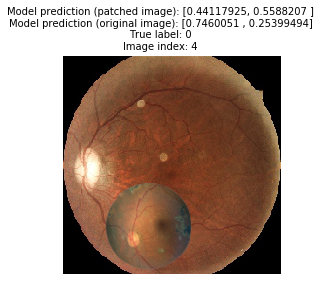

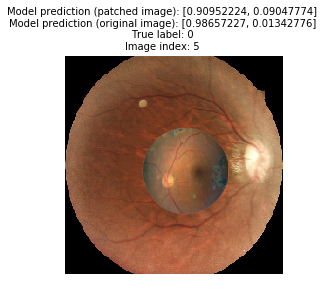

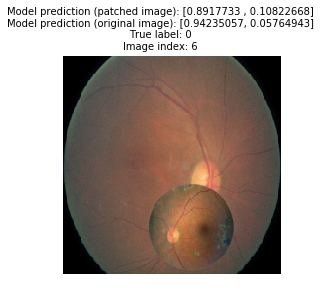

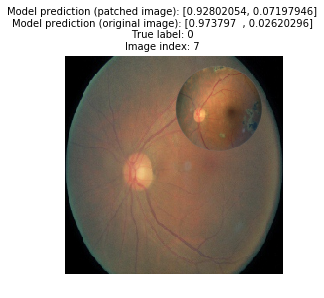

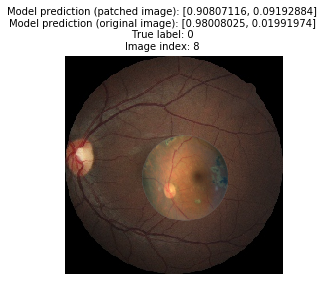

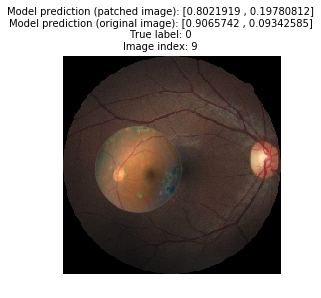

Test accuracy: 0.7914
AUC: 0.8281
Avg. Confidence: 0.810821 (0.808082 - 0.813561)


In [7]:
# Combined attack with mole-patches
file_name0 = './patches/natural_patch_min_p.npy'
file_name1 = './patches/natural_patch_max_p.npy'
mole_patch0 = np.load(file_name0)
mole_patch1 = np.load(file_name1)
scale = 0.4
probs_patched_images, probs_original_images, indices, true_labels, winp = attack_combined(resnet1, patch_for_0=mole_patch0, patch_for_1=mole_patch1, n_show=10, scale=scale, predict_original=False)
printResults(probs_patched_images, keras.utils.to_categorical(true_labels))